<center>
  <font color="darkblue">
    <span style="font-family: 'Times New Roman'; font-size: 22pt; line-height: 1.5;">
      <h1><b>Projet Deep Learning</b></h1>
    </span>
  </font>
</center>

<center>
  <font color="darkblue">
    <span style="font-family: 'Times New Roman'; font-size: 16pt; line-height: 1.5;">
      <h1><b>Prédiction des prix alimentaires en Mauritanie</b></h1>
    </span>
  </font>
</center>

<center>
  <font color="darkblue">
    <span style="font-family: 'Times New Roman'; font-size: 12pt; line-height: 1.5;">
      <h1><i>Équipe de projet : 22032, 22117, 22240</i></h1>
    </span>
  </font>
</center>


<div style="text-align:center">
       <img src="food.png" style="width:60%; height:auto;" />
</div>

<div style="background-color: #d1e7f2; padding: 20px; border-radius: 10px;">
    <font color="navy">
        <span style="font-family: 'Times New Roman'; font-size: 16pt;">
            <b>I-2.&nbsp;&nbsp;&nbsp; <b> Contexte:</b>
        </span>
    </font>
</div>


La Mauritanie, confrontée à des défis persistants en matière de sécurité alimentaire, cherche des solutions innovantes pour anticiper les fluctuations des prix des denrées alimentaires. Dans ce contexte, l'utilisation de modèles prédictifs tels que les réseaux de neurones récurrents à mémoire à long terme (LSTM) offre une approche prometteuse. Ce projet se concentre sur l'application de ces modèles pour prédire les prix des aliments en Mauritanie en utilisant les données fournies par le Programme alimentaire mondial (WFP) sur la période de 2003 à 2023. L'objectif est de fournir des outils prédictifs précieux pour les acteurs locaux afin de les aider à prendre des décisions éclairées en matière de politique alimentaire et de planification économique, contribuant ainsi à atténuer les risques liés à l'insécurité alimentaire et à promouvoir la stabilité économique dans la région.


<div style="background-color: #d1e7f2; padding: 20px; border-radius: 10px;">
    <font color="navy">
        <span style="font-family: 'Times New Roman'; font-size: 16pt;">
            <b>I-2.&nbsp;&nbsp;&nbsp; <b> Presentation des variables :</b>
        </span>
    </font>
</div>


| Variable   | Définition                                                                               |
|------------|------------------------------------------------------------------------------------------|
| date       | Date de l'enregistrement du prix (format: AAAA-MM-JJ)                                    |
| admin1     | Région administrative de niveau 1 en Mauritanie                                          |
| admin2     | Région administrative de niveau 2 en Mauritanie                                          |
| market     | Nom du marché où le prix a été relevé                                                    |
| latitude   | Latitude géographique du marché (en degrés décimaux)                                     |
| longitude  | Longitude géographique du marché (en degrés décimaux)                                    |
| category   | Catégorie de la denrée alimentaire                                                       |
| commodity  | Nom de la denrée alimentaire                                                             |
| unit       | Unité de mesure utilisée pour le prix (e.g., KG, L)                                      |
| priceflag  | Type de prix (e.g., "actual" pour un prix réel)                                          |
| pricetype  | Type de marché (e.g., "Retail" pour vente au détail)                                     |
| currency   | Devise utilisée pour le prix (e.g., MRU pour Ouguiya mauritanienne)                      |
| price      | Prix de la denrée alimentaire dans la devise locale                                      |
| usdprice   | Prix de la denrée alimentaire en dollars américains (USD)                                |


<div style="background-color: #d1e7f2; padding: 20px; border-radius: 10px;">
    <font color="navy">
        <span style="font-family: 'Times New Roman'; font-size: 16pt;">
            <b>II-1.&nbsp;&nbsp;&nbsp; Chargement des packages & Importation des Datasets
</b>
        </span>
    </font>
</div>


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
output_notebook()


Loading BokehJS ...

In [ ]:
# Charger les données en ignorant la deuxième ligne
df = pd.read_csv("wfp_food_prices_mrt.csv", skiprows=[1])


<div style="background-color: #d1e7f2; padding: 20px; border-radius: 10px;">
    <font color="navy">
        <span style="font-family: 'Times New Roman'; font-size: 16pt;">
            <b>II-3.&nbsp;&nbsp;&nbsp; Data Exploration  :</b>
        </span>
    </font>
</div>


  * *Source des données :*
Les données utilisées dans ce projet proviennent de la base de données des prix alimentaires de la Mauritanie, fournies par le Programme Alimentaire Mondial (WFP). Les données couvrent diverses denrées alimentaires et leurs prix enregistrés sur une période de plusieurs années.


In [ ]:
print("....................................")
df.head()

....................................


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2003-10-15,Nouakchott,Nouakchott,Nouakchott,18.119057,-16.022385,cereals and tubers,Rice (imported),KG,actual,Retail,MRU,17.60,0.6782
1,2003-10-15,Nouakchott,Nouakchott,Nouakchott,18.119057,-16.022385,cereals and tubers,Wheat flour,KG,actual,Retail,MRU,8.80,0.3391
2,2003-10-15,Nouakchott,Nouakchott,Nouakchott,18.119057,-16.022385,"meat, fish and eggs",Meat (beef),KG,actual,Retail,MRU,6.39,0.2462
3,2003-10-15,Nouakchott,Nouakchott,Nouakchott,18.119057,-16.022385,"meat, fish and eggs",Meat (camel),KG,actual,Retail,MRU,6.24,0.2405
4,2003-11-15,Nouakchott,Nouakchott,Nouakchott,18.119057,-16.022385,cereals and tubers,Rice (imported),KG,actual,Retail,MRU,17.80,0.6736


In [ ]:
df.shape

(14319, 14)

In [ ]:
df["priceflag"].value_counts()

actual       8972
aggregate    5347
Name: priceflag, dtype: int64

In [ ]:
df["pricetype"].value_counts()

Retail    14319
Name: pricetype, dtype: int64

In [ ]:
print(df.info())
print("........................................")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       14319 non-null  object 
 1   admin1     14319 non-null  object 
 2   admin2     14319 non-null  object 
 3   market     14319 non-null  object 
 4   latitude   14319 non-null  float64
 5   longitude  14319 non-null  float64
 6   category   14319 non-null  object 
 7   commodity  14319 non-null  object 
 8   unit       14319 non-null  object 
 9   priceflag  14319 non-null  object 
 10  pricetype  14319 non-null  object 
 11  currency   14319 non-null  object 
 12  price      14319 non-null  float64
 13  usdprice   14319 non-null  float64
dtypes: float64(4), object(10)
memory usage: 1.5+ MB
None
........................................
           latitude     longitude         price      usdprice
count  14319.000000  14319.000000  14319.000000  14319.000000
mean      17.319529    -13.1

In [ ]:
df['admin1'].value_counts()

Brakna                2296
Adrar                 1857
Assaba                1569
Nouakchott            1466
Trarza                1335
Guidimakha            1334
Hodh El Gharbi        1312
Dakhlet-Nouadhibou    1087
Hodh Ech Chargi        876
Gorgol                 768
Tagant                 390
Tiris-Zemmour           29
Name: admin1, dtype: int64

In [ ]:
df.shape9

(14319, 14)

In [ ]:
# Afficher le nombre de valeurs uniques dans chaque colonne
print("Nombre de valeurs uniques dans chaque colonne :")
print(df.nunique())

Nombre de valeurs uniques dans chaque colonne :
date          243
admin1         12
admin2         28
market         34
latitude       33
longitude      34
category        7
commodity      26
unit            5
priceflag       2
pricetype       1
currency        1
price        3469
usdprice     7467
dtype: int64


In [ ]:
print("********latitude********")
print(df["latitude"].unique())
print("********longitude********")
print(df["longitude"].unique())

********latitude********
[18.119057   19.962222   16.5950699  17.52       15.65       15.53448943
 17.873645   16.896389   15.938907   16.38       20.51091    20.927666
 16.640389   17.0516148  16.15177    20.9127     16.215843   16.02294
 15.509153   15.52       14.770003   15.158946   15.131041   15.5571
 22.688333   16.171314   18.1        18.555      16.6162     16.617069
 16.14653    16.7        16.51277733]
********longitude********
[-16.022385   -13.059444   -14.2599437  -13.1        -13.2166667
  -7.03161    -12.331847   -15.756111   -11.527006   -10.17
 -13.04978    -11.621376   -12.498493   -13.9114989  -13.77648
 -17.048845   -13.144934   -12.57946    -12.850055   -11.72
 -12.250899   -12.182897   -12.72555     -5.516      -10.13
 -12.459167   -16.500429   -15.95       -11.4256      -7.2535
 -11.40388    -13.504739    -9.6        -15.80500031]


In [ ]:
df["commodity"].value_counts()

Sugar                                             1727
Oil (vegetable)                                   1723
Rice (imported)                                   1670
Rice (local)                                      1519
Wheat                                             1490
Sorghum (taghalit)                                1259
Wheat flour                                        522
Milk (powder)                                      470
Beans (niebe)                                      454
Maize (local)                                      368
Pasta (macaroni)                                   326
Wheat meal                                         310
Livestock (goat, medium-sized male)                293
Feed (rakhel)                                      289
Livestock (sheep, medium-sized castrated male)     286
Feed (flour)                                       264
Meat (camel)                                       197
Meat (beef)                                        197
Livestock 

In [ ]:
df[df["admin2"]=="Aleg"]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
2686,2013-07-15,Brakna,Aleg,Aleg,17.051615,-13.911499,cereals and tubers,Rice (local),KG,actual,Retail,MRU,19.00,0.6507
2687,2013-07-15,Brakna,Aleg,Aleg,17.051615,-13.911499,cereals and tubers,Sorghum (taghalit),KG,actual,Retail,MRU,29.50,1.0103
2688,2013-07-15,Brakna,Aleg,Aleg,17.051615,-13.911499,cereals and tubers,Wheat,KG,actual,Retail,MRU,15.00,0.5137
2689,2013-07-15,Brakna,Aleg,Aleg,17.051615,-13.911499,miscellaneous food,Sugar,KG,actual,Retail,MRU,24.00,0.8219
2690,2013-07-15,Brakna,Aleg,Aleg,17.051615,-13.911499,oil and fats,Oil (vegetable),L,actual,Retail,MRU,44.75,1.5325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,2019-11-15,Brakna,Aleg,Aleg,17.051615,-13.911499,cereals and tubers,Wheat,KG,actual,Retail,MRU,14.50,0.3875
8622,2019-11-15,Brakna,Aleg,Aleg,17.051615,-13.911499,milk and dairy,Milk (powder),KG,actual,Retail,MRU,165.00,4.4094
8623,2019-11-15,Brakna,Aleg,Aleg,17.051615,-13.911499,miscellaneous food,Sugar,KG,actual,Retail,MRU,22.00,0.5879
8624,2019-11-15,Brakna,Aleg,Aleg,17.051615,-13.911499,oil and fats,Oil (vegetable),L,actual,Retail,MRU,45.00,1.2026


In [ ]:
df["admin2"].value_counts()

Nouakchott       1466
Tintane          1271
Keur Macene      1125
Ould Yenge       1119
Barkeol          1117
Nouadhibou       1087
Ouadane           945
M'Bagne           930
Aoujeft           841
Boghe             668
Maghta Lahjar     630
Amourj            630
Kaedi             603
Kankossa          391
Moudjeria         335
Selibaby          215
Mederdra          150
Bassikounou       141
Nema              105
M'Bout             83
Maghama            82
Atar               71
Aleg               68
Kiffa              61
Rosso              60
Tidjikja           55
Aioun              41
Zoueratt           29
Name: admin2, dtype: int64

<div style="background-color: #d1e7f2; padding: 20px; border-radius: 10px;">
    <font color="navy">
        <span style="font-family: 'Times New Roman'; font-size: 16pt;">
            <b>II-3.&nbsp;&nbsp;&nbsp; Data Visialization  :</b>
        </span>
    </font>
</div>


- *Introduction* :
La visualisation des données est cruciale pour comprendre les tendances, les saisons et les anomalies potentielles dans les séries temporelles des prix alimentaires. Les graphiques suivants offrent une vue d'ensemble des données et aident à identifier les principales caractéristiques des prix alimentaires en Mauritanie.

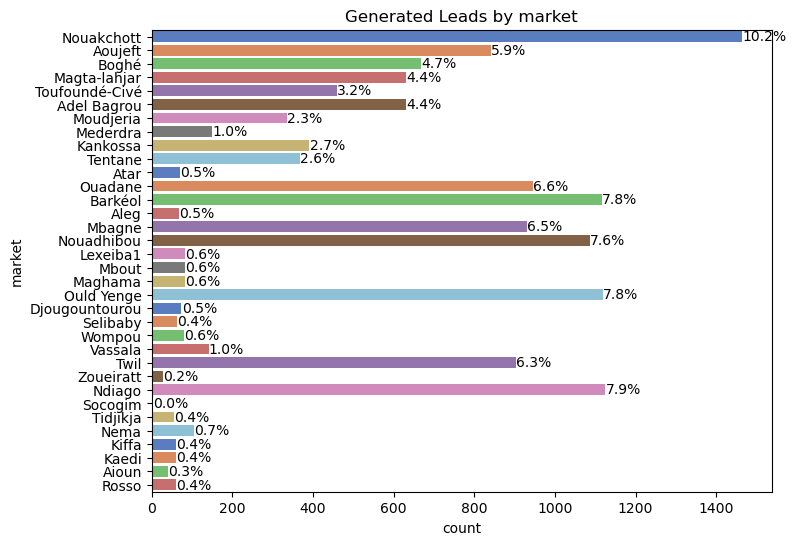

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df,
                   y="market",
                   palette="muted")
plt.title("Generated Leads by market")

# Ajouter les pourcentages sur chaque barre
total = len(df["market"])  # Nombre total d'observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)  # Calculer le pourcentage
    x = p.get_width() + 0.5  # Position x pour l'étiquette
    y = p.get_y() + p.get_height() / 2  # Position y pour l'étiquette
    ax.annotate(percentage, (x, y), ha='left', va='center')

plt.savefig('market_with_percentage.jpg')
plt.show()


Les points de vente prélevés se présentent en majorité à Nouakchott, tandis que Rosso présente le plus faible nombre de points de vente.

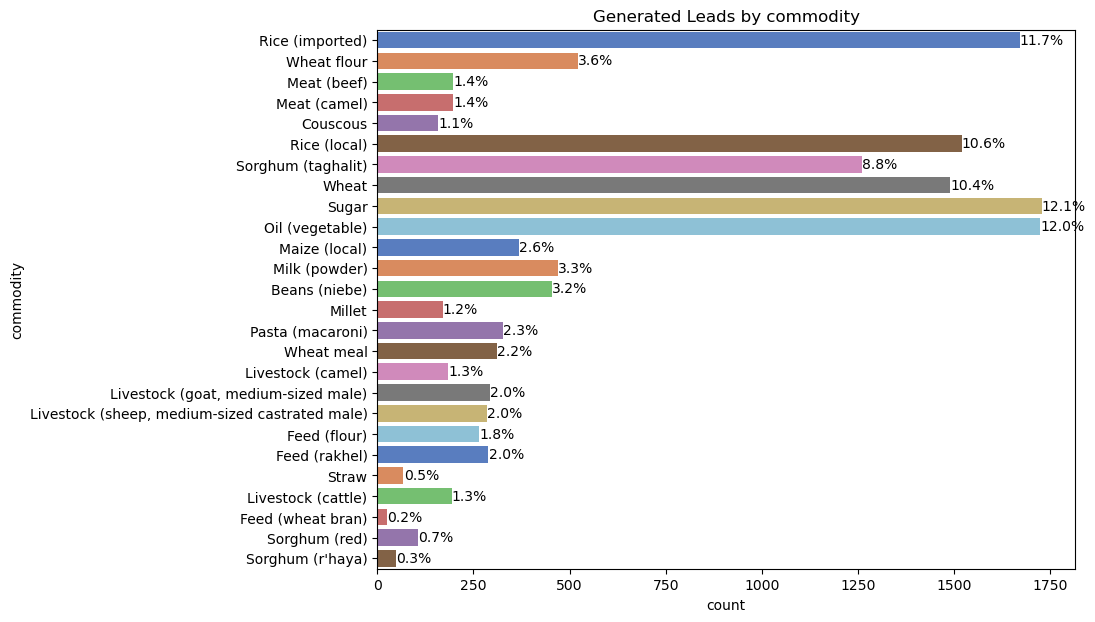

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df,
                   y="commodity",
                   palette="muted")
plt.title("Generated Leads by commodity")

# Ajouter les pourcentages sur chaque barre
total = len(df["commodity"])  # Nombre total d'observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)  # Calculer le pourcentage
    x = p.get_width() + 0.5  # Position x pour l'étiquette
    y = p.get_y() + p.get_height() / 2  # Position y pour l'étiquette
    ax.annotate(percentage, (x, y), ha='left', va='center')

plt.savefig('commodity_with_percentage.jpg')
plt.show()


* Le sucre, l'huile végétale et le riz, qu'ils soient locaux ou importés, occupent une part significative du marché mauritanien par rapport à d'autres produits.

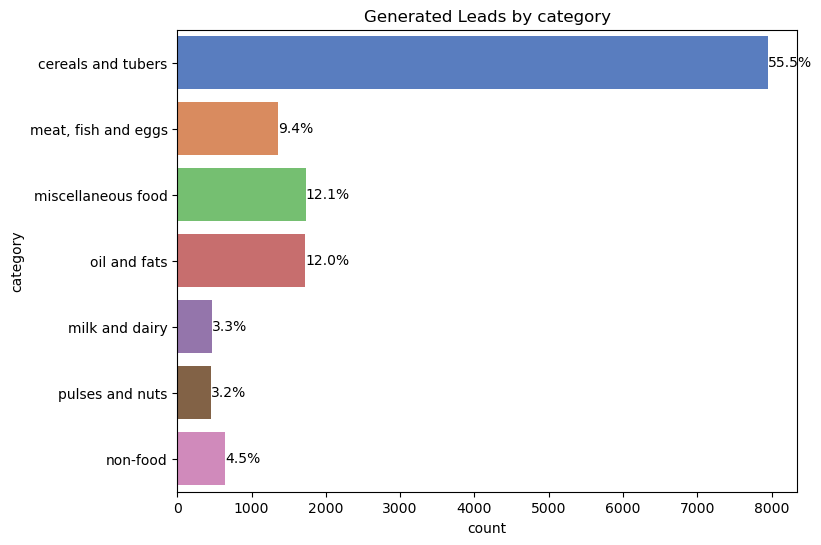

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df,
                   y="category",
                   palette="muted")
plt.title("Generated Leads by category")

# Ajouter les pourcentages sur chaque barre
total = len(df["category"])  # Nombre total d'observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)  # Calculer le pourcentage
    x = p.get_width() + 0.5  # Position x pour l'étiquette
    y = p.get_y() + p.get_height() / 2  # Position y pour l'étiquette
    ax.annotate(percentage, (x, y), ha='left', va='center')

plt.savefig('category_with_percentage5.jpg')
plt.show()


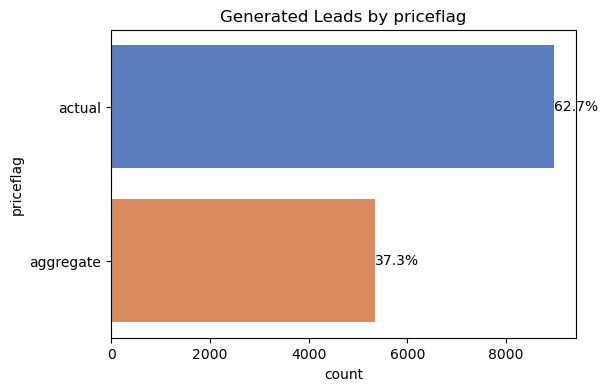

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df,
                   y="priceflag",
                   palette="muted")
plt.title("Generated Leads by priceflag")

# Ajouter les pourcentages sur chaque barre
total = len(df["priceflag"])  # Nombre total d'observations
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)  # Calculer le pourcentage
    x = p.get_x() + p.get_width() + 0.02  # Position x pour l'étiquette
    y = p.get_y() + p.get_height() / 2  # Position y pour l'étiquette
    ax.annotate(percentage, (x, y), ha='left', va='center')

plt.savefig('priceflag_with_percentage.jpg')
plt.show()


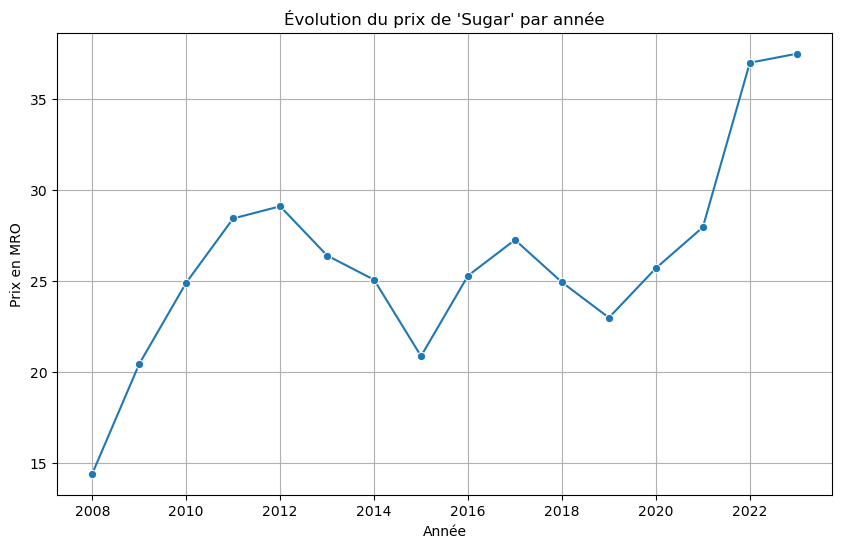

In [ ]:

# Convertir 'usdprice' en type numérique, en forçant les erreurs éventuelles
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Filtrer les données pour "Rice (imported)"
rice_df = df[df['commodity'] == 'Sugar'].copy()

# Extraire l'année de la date
rice_df['year'] = rice_df['date'].dt.year

# Calculer la moyenne des prix par année
average_price_per_year = rice_df.groupby('year')['price'].mean().reset_index()

# Visualiser les résultats
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_per_year, x='year', y='price', marker='o')
plt.title("Évolution du prix de 'Sugar' par année")
plt.xlabel("Année")
plt.ylabel("Prix en MRO")
plt.grid(True)
plt.savefig('rice_price_evolution1.jpg')
plt.show()

L'évolution du prix du sucre a connu une augmentation entre 2008 et 2014, suivie d'une baisse en 2015, puis une forte augmentation en 2021.

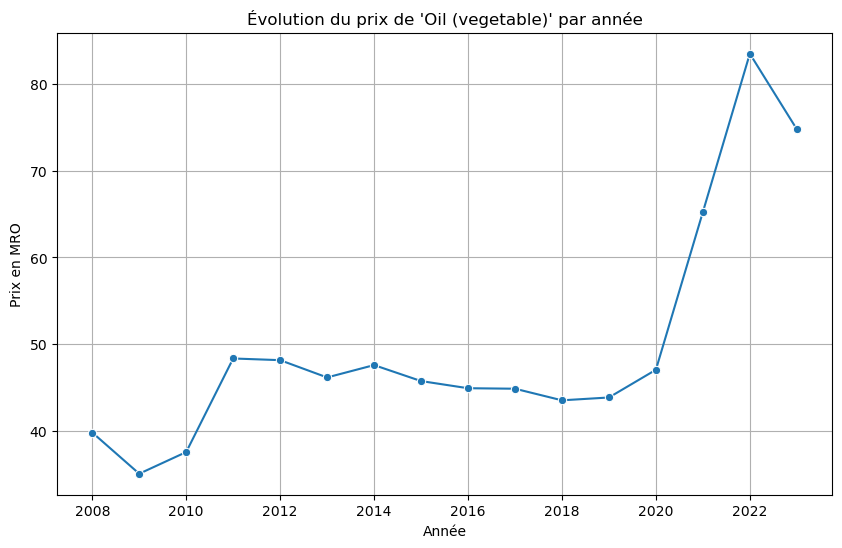

In [ ]:
# Convertir 'usdprice' en type numérique, en forçant les erreurs éventuelles
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Filtrer les données pour "Rice (imported)"
rice_df = df[df['commodity'] == 'Oil (vegetable)'].copy()

# Extraire l'année de la date
rice_df['year'] = rice_df['date'].dt.year

# Calculer la moyenne des prix par année
average_price_per_year = rice_df.groupby('year')['price'].mean().reset_index()

# Visualiser les résultats
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_per_year, x='year', y='price', marker='o')
plt.title("Évolution du prix de 'Oil (vegetable)' par année")
plt.xlabel("Année")
plt.ylabel("Prix en MRO")
plt.grid(True)
plt.savefig('rice_price_evolution3.jpg')
plt.show()


Le prix de l'huile végétale a présenté une évolution quasi constante au cours des années, suivie d'une forte augmentation à partir de 2020 due a la pandemie du corona.

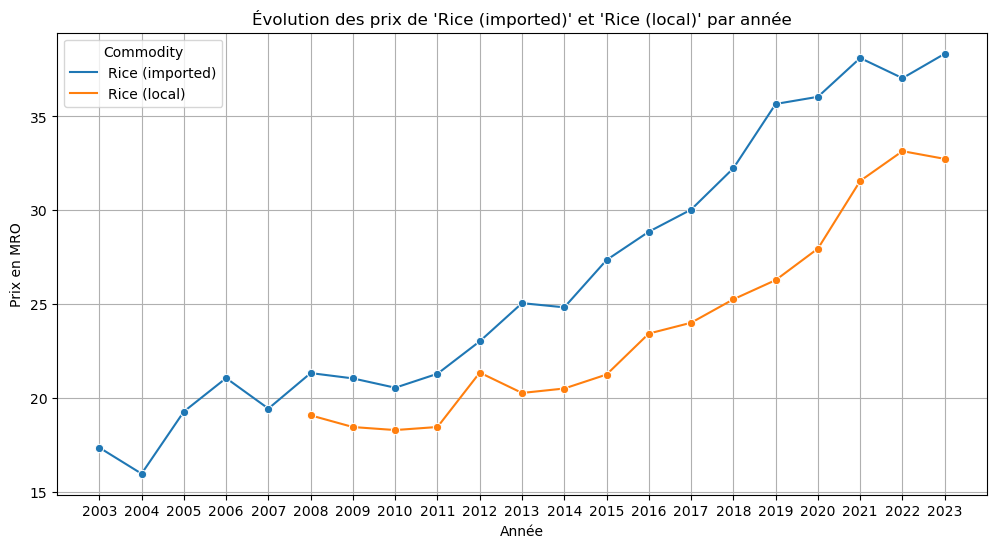

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir 'price' en type numérique, en forçant les erreurs éventuelles
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Filtrer les données pour "Rice (imported)" et "Rice (local)"
rice_df = df[df['commodity'].isin(['Rice (imported)', 'Rice (local)'])].copy()

# Extraire l'année de la date
rice_df.loc[:, 'year'] = rice_df['date'].dt.year

# Calculer la moyenne des prix par année et par type de riz
average_price_per_year = rice_df.groupby(['year', 'commodity'])['price'].mean().reset_index()

# S'assurer que les années sont traitées comme des entiers
average_price_per_year['year'] = average_price_per_year['year'].astype(int)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_year, x='year', y='price', hue='commodity', marker='o')
plt.title("Évolution des prix de 'Rice (imported)' et 'Rice (local)' par année")
plt.xlabel("Année")
plt.ylabel("Prix en MRO")
plt.legend(title='Commodity')
plt.xticks(average_price_per_year['year'].unique())  # Assurez-vous que seules les années distinctes sont affichées
plt.grid(True)
plt.savefig('rice_price_comparison.jpg')
plt.show()


Le prix du riz importé a toujours été supérieur à celui du riz local au cours des annees .

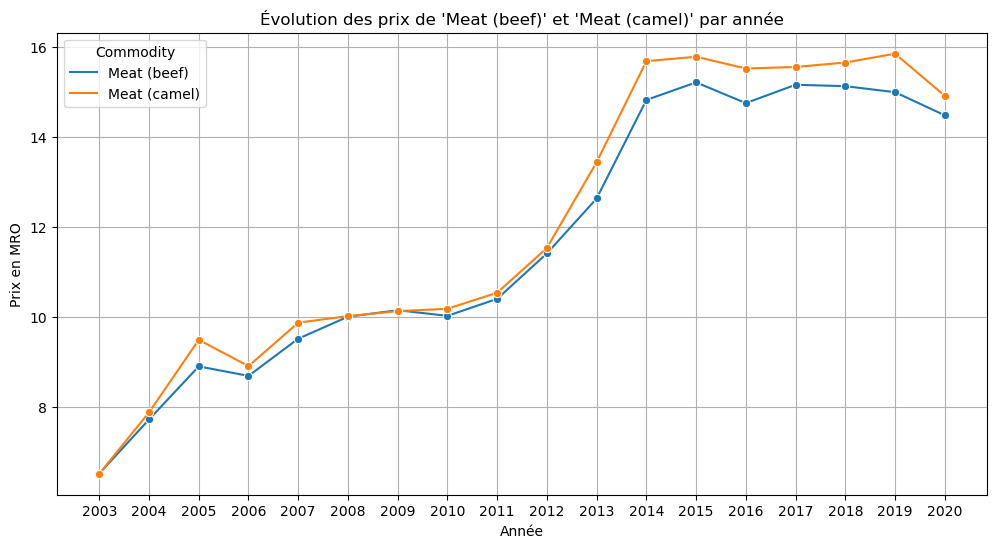

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir 'usdprice' en type numérique, en forçant les erreurs éventuelles
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Filtrer les données pour "Rice (imported)" et "Rice (local)"
rice_df = df[df['commodity'].isin(['Meat (beef)', 'Meat (camel)'])].copy()

# Extraire l'année de la date
rice_df['year'] = rice_df['date'].dt.year

# Calculer la moyenne des prix par année et par type de riz
average_price_per_year = rice_df.groupby(['year', 'commodity'])['price'].mean().reset_index()

# S'assurer que les années sont traitées comme des entiers
average_price_per_year['year'] = average_price_per_year['year'].astype(int)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_year, x='year', y='price', hue='commodity', marker='o')
plt.title("Évolution des prix de 'Meat (beef)' et 'Meat (camel)' par année")
plt.xlabel("Année")
plt.ylabel("Prix en MRO")
plt.legend(title='Commodity')
plt.xticks(average_price_per_year['year'].unique())  # Assurez-vous que seules les années distinctes sont affichées
plt.grid(True)
plt.savefig('rice_price_comparison.jpg')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

# Convertir la colonne 'date' en datetime si ce n'est pas déjà fait
df['date'] = pd.to_datetime(df['date'])

# Filtrer les données pour l'année 2019
df_2019 = df[df['date'].dt.year == 2019]

# Filtrer les données pour "Sugar"
df_sugar = df_2019[df_2019['commodity'] == 'Sugar']

# Calculer les prix moyens par région admin2 pour "Sugar"
prix_moyens_sugar = df_sugar.groupby(['admin2', 'latitude', 'longitude'])['price'].mean().reset_index()

# Ajouter une colonne 'year' avec la valeur 2019
prix_moyens_sugar['year'] = 2019

# Fonction pour convertir les coordonnées latitude et longitude en coordonnées Web Mercator
def wgs84_to_web_mercator(df, lon="longitude", lat="latitude"):
    k = 6378137
    df["x"] = df[lon] * (k * np.pi / 180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi / 360.0)) * k
    return df

# Appliquer la conversion sur les données
prix_moyens_sugar = wgs84_to_web_mercator(prix_moyens_sugar)

# Créer une source de données pour Bokeh
source = ColumnDataSource(prix_moyens_sugar)

# Initialiser la carte
p = figure(title="Prix moyen de Sugar en 2019", x_axis_type="mercator", y_axis_type="mercator",
           width=800, height=600)
tile_provider = get_provider(Vendors.CARTODBPOSITRON)
p.add_tile(tile_provider)

# Ajouter des cercles pour chaque point de donnée
p.circle(x="x", y="y", size=10, fill_color="blue", fill_alpha=0.8, source=source)

# Ajouter des outils de survol
hover = HoverTool()
hover.tooltips = [("Région", "@admin2"), ("Prix moyen (MRU)", "@price{0.2f}"), ("Année", "@year")]
p.add_tools(hover)

# Afficher la carte
show(p)


Loading BokehJS ...

In [ ]:
# Convertir la colonne 'date' en datetime si ce n'est pas déjà fait
df['date'] = pd.to_datetime(df['date'])

# Filtrer les données pour l'année 2019
df_2019 = df[df['date'].dt.year == 2019]

# Filtrer les données pour "Oil (vegetable)"
df_oil = df_2019[df_2019['commodity'] == 'Oil (vegetable)']

# Calculer les prix moyens par région admin2 pour "Oil (vegetable)"
prix_moyens_oil = df_oil.groupby(['admin2', 'latitude', 'longitude'])['price'].mean().reset_index()

# Ajouter une colonne 'year' avec la valeur 2019
prix_moyens_oil['year'] = 2019

# Fonction pour convertir les coordonnées latitude et longitude en coordonnées Web Mercator
def wgs84_to_web_mercator(df, lon="longitude", lat="latitude"):
    k = 6378137
    df["x"] = df[lon] * (k * np.pi / 180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi / 360.0)) * k
    return df

# Appliquer la conversion sur les données
prix_moyens_oil = wgs84_to_web_mercator(prix_moyens_oil)

# Créer une source de données pour Bokeh
source = ColumnDataSource(prix_moyens_oil)

# Initialiser la carte
p = figure(title="Prix moyen de Oil (vegetable) en 2019", x_axis_type="mercator", y_axis_type="mercator",
           width=800, height=600)
tile_provider = get_provider(Vendors.CARTODBPOSITRON)
p.add_tile(tile_provider)

# Ajouter des cercles pour chaque point de donnée
p.circle(x="x", y="y", size=10, fill_color="blue", fill_alpha=0.8, source=source)

# Ajouter des outils de survol
hover = HoverTool()
hover.tooltips = [("Région", "@admin2"), ("Prix moyen (MRU)", "@price{0.2f}"), ("Année", "@year")]
p.add_tools(hover)

# Afficher la carte
show(p)


In [ ]:

# Convertir la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'])

# Filtrer les données pour l'année 2019
df_2023 = df[df['date'].dt.year == 2019]

# Filtrer les données pour "Rice (imported)" et "Rice (local)"
df_rice = df_2023[df_2023['commodity'].isin(['Rice (imported)', 'Rice (local)'])]

# Calculer les prix moyens par région admin2 pour chaque type de riz
prix_moyens_rice = df_rice.groupby(['admin2', 'commodity', 'latitude', 'longitude'])['price'].mean().reset_index()

# Ajouter une colonne 'year' avec la valeur 2019
prix_moyens_rice['year'] = 2019

# Fonction pour convertir les coordonnées latitude et longitude en coordonnées Web Mercator
def wgs84_to_web_mercator(df, lon="longitude", lat="latitude"):
    k = 6378137
    df["x"] = df[lon] * (k * np.pi / 180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi / 360.0)) * k
    return df

# Appliquer la conversion sur les données
prix_moyens_rice = wgs84_to_web_mercator(prix_moyens_rice)

# Créer une source de données pour Bokeh
source = ColumnDataSource(prix_moyens_rice)

# Initialiser la carte
p = figure(title="Prix moyen de Rice (imported) et Rice (local) en 2019", x_axis_type="mercator", y_axis_type="mercator",
           width=800, height=600)
tile_provider = get_provider(Vendors.CARTODBPOSITRON)
p.add_tile(tile_provider)

# Ajouter des cercles pour chaque type de riz avec des couleurs différentes
color_mapper = CategoricalColorMapper(factors=['Rice (imported)', 'Rice (local)'], palette=['blue', 'green'])
p.circle(x="x", y="y", size=10, fill_color={'field': 'commodity', 'transform': color_mapper}, fill_alpha=0.8, source=source)

# Ajouter des outils de survol
hover = HoverTool()
hover.tooltips = [("Région", "@admin2"), ("Type de riz", "@commodity"), ("Prix moyen (MRU)", "@price{0.2f}"), ("Année", "@year")]
p.add_tools(hover)

# Afficher la carte
show(p)


Stationnarité pour Sugar
Test de stationnarité pour le produit Sugar:
ADF Statistic: -0.9607983433362521
p-value: 0.7672924427313252
Critical Values:
	1%: -3.4654311561944873
	5%: -2.8769570530458792
	10%: -2.574988319755886


Stationnarité pour Oil (vegetable)
Test de stationnarité pour le produit Oil (vegetable):
ADF Statistic: -1.5894976365253257
p-value: 0.48886703834432743
Critical Values:
	1%: -3.466398230774071
	5%: -2.8773796387256514
	10%: -2.575213838610586


Stationnarité pour Rice (imported)
Test de stationnarité pour le produit Rice (imported):
ADF Statistic: -0.5865086528083452
p-value: 0.8740014704315165
Critical Values:
	1%: -3.4578942529658563
	5%: -2.8736593200231484
	10%: -2.573228767361111


Stationnarité pour Rice (local)
Test de stationnarité pour le produit Rice (local):
ADF Statistic: 0.4616749454310381
p-value: 0.9836604914570902
Critical Values:
	1%: -3.4668001583460613
	5%: -2.8775552336674317
	10%: -2.5753075498128246


Stationnarité pour Meat (camel)
Test d

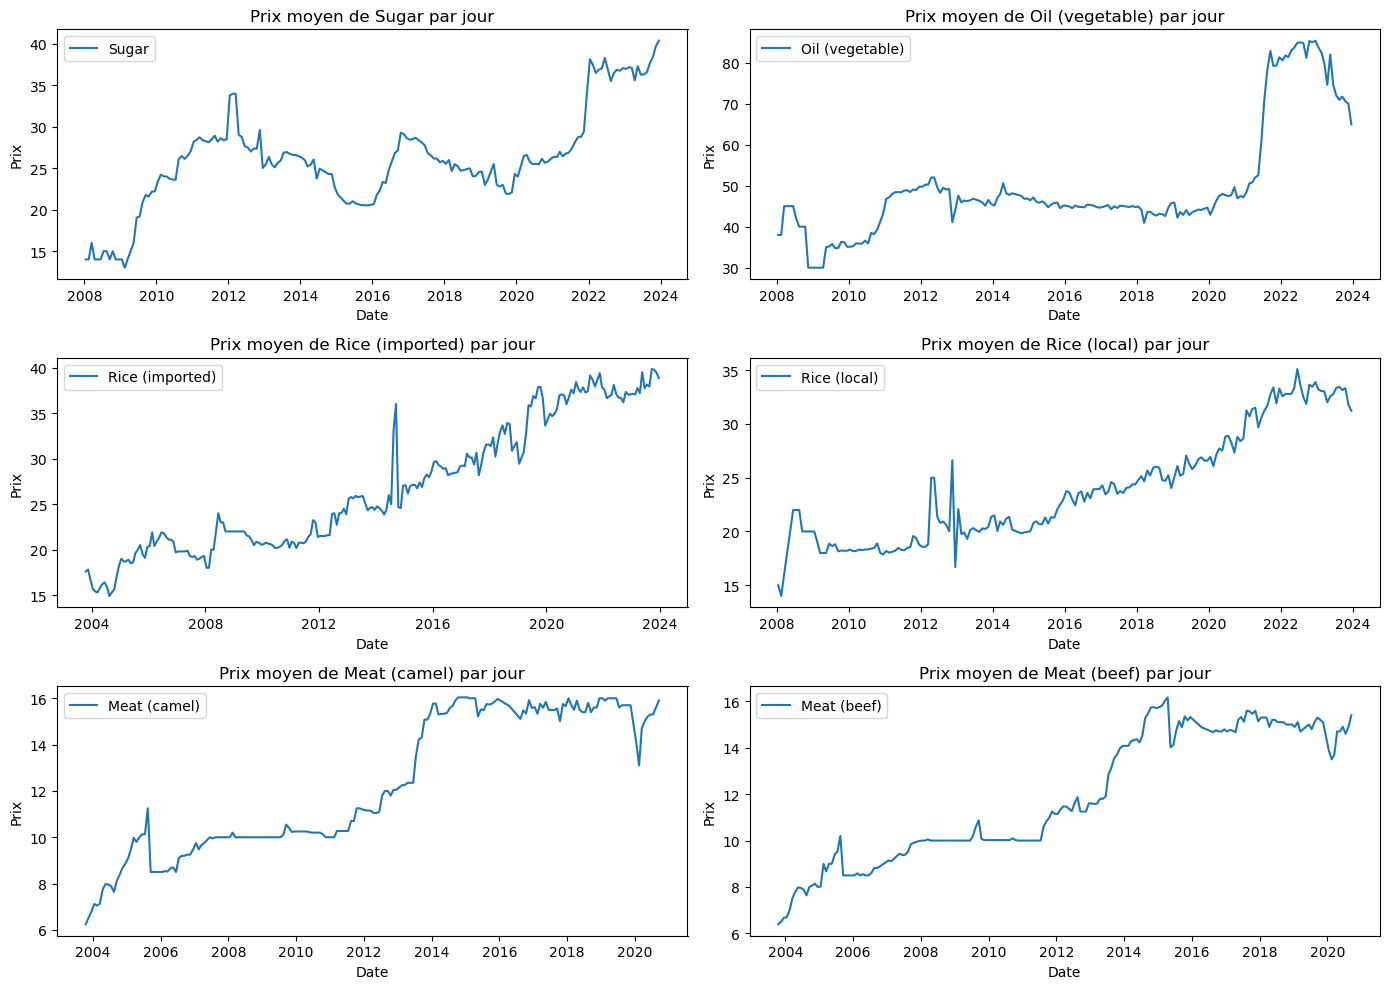

In [ ]:
# Convertir la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'])

# Produits spécifiés
produits_specifies = ['Sugar', 'Oil (vegetable)', 'Rice (imported)', 'Rice (local)', 'Meat (camel)', 'Meat (beef)']

# Calculer la moyenne des prix par jour et produit
df_moyennes = df.groupby(['date', 'commodity'])['price'].mean().reset_index()

# Filtrer les données pour les produits spécifiés
df_produits = df_moyennes[df_moyennes['commodity'].isin(produits_specifies)]

# Créer une fonction pour tester la stationnarité
def test_stationarity(df, product_name):
    result = adfuller(df['price'])
    print(f'Test de stationnarité pour le produit {product_name}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    print('\n')

# Tester la stationnarité pour chaque produit et visualiser les séries temporelles
plt.figure(figsize=(14, 10))
for i, produit in enumerate(produits_specifies):
    df_produit = df_produits[df_produits['commodity'] == produit]

    # Appliquer le test ADF
    print(f"Stationnarité pour {produit}")
    test_stationarity(df_produit, produit)

    # Tracer les séries temporelles
    plt.subplot(3, 2, i+1)
    plt.plot(df_produit['date'], df_produit['price'], label=produit)
    plt.title(f'Prix moyen de {produit} par jour')
    plt.xlabel('Date')
    plt.ylabel('Prix')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()


### Résultats des tests de stationnarité :

1. **Sugar**
   - ADF Statistic: -0.9607983433362531
   - p-value: 0.767292442731325
   - Critical Values:
     - 1%: -3.4654311561944873
     - 5%: -2.8769570530458792
     - 10%: -2.574988319755886

   **Commentaire**: La série de prix du sucre n'est pas stationnaire. La statistique ADF est supérieure à la valeur critique à 5% et la p-value est bien supérieure à 0.05.

2. **Oil (vegetable)**
   - ADF Statistic: -1.5894976365253255
   - p-value: 0.4888670383443275
   - Critical Values:
     - 1%: -3.466398230774071
     - 5%: -2.8773796387256514
     - 10%: -2.575213838610586

   **Commentaire**: La série de prix de l'huile végétale n'est pas stationnaire. La statistique ADF est supérieure à la valeur critique à 5% et la p-value est supérieure à 0.05.

3. **Rice (imported)**
   - ADF Statistic: -0.5865086528083452
   - p-value: 0.8740014704315165
   - Critical Values:
     - 1%: -3.4578942529658563
     - 5%: -2.8736593200231484
     - 10%: -2.573228767361111

   **Commentaire**: La série de prix du riz importé n'est pas stationnaire. La statistique ADF est bien supérieure à la valeur critique à 5% et la p-value est très supérieure à 0.05.

4. **Rice (local)**
   - ADF Statistic: 0.4616749454310371
   - p-value: 0.9836604914570902
   - Critical Values:
     - 1%: -3.4668001583460613
     - 5%: -2.8775552336674317
     - 10%: -2.5753075498128246

   **Commentaire**: La série de prix du riz local n'est pas stationnaire. La statistique ADF est supérieure à la valeur critique à 5% et la p-value est très supérieure à 0.05.

5. **Meat (camel)**
   - ADF Statistic: -1.4864764866446432
   - p-value: 0.5401903054388553
   - Critical Values:
     - 1%: -3.464337030867007
     - 5%: -2.876478799035722
     - 10%: -2.574733103221565

   **Commentaire**: La série de prix de la viande de chameau n'est pas stationnaire. La statistique ADF est supérieure à la valeur critique à 5% et la p-value est supérieure à 0.05.

6. **Meat (beef)**
   - ADF Statistic: -1.4673441268651242
   - p-value: 0.5495994771520452
   - Critical Values:
     - 1%: -3.464161278384219
     - 5%: -2.876401960790147
     - 10%: -2.5746921001665974

   **Commentaire**: La série de prix de la viande de bœuf n'est pas stationnaire. La statistique ADF est supérieure à la valeur critique à 5% et la p-value est supérieure à 0.05.

### Conclusion :

Aucune des séries de prix des produits analysés (Sugar, Oil (vegetable), Rice (imported), Rice (local), Meat (camel), Meat (beef)) n'est stationnaire. Cela signifie que les séries temporelles de ces prix ont tendance à varier au fil du temps, et des transformations ou des méthodes de différenciation pourraient être nécessaires pour les rendre stationnaires avant d'appliquer des modèles de prévision ou des analyses de séries temporelles.


### Justification des résultats dans le contexte de la Mauritanie :

1. **Sugar**
   - La non-stationnarité des prix du sucre peut être attribuée à la dépendance aux importations et aux fluctuations des prix internationaux. Les variations dans les coûts de transport et les politiques commerciales influencent également les prix.

2. **Oil (vegetable)**
   - Les prix de l'huile végétale montrent une non-stationnarité due à la volatilité des marchés internationaux et à la dépendance aux importations. Les variations saisonnières dans la production et les coûts de transport jouent également un rôle.

3. **Rice (imported)**
   - La non-stationnarité des prix du riz importé reflète la dépendance de la Mauritanie aux importations pour répondre à la demande locale. Les fluctuations des prix internationaux, les coûts de transport et les variations des taux de change influencent les prix.

4. **Rice (local)**
   - Les prix du riz local ne sont pas stationnaires en raison des variations saisonnières de la production, des conditions climatiques changeantes et des techniques agricoles. La dépendance aux conditions météorologiques et aux infrastructures locales affecte également les prix.

5. **Meat (camel)**
   - La non-stationnarité des prix de la viande de chameau peut être attribuée aux variations saisonnières de l'offre, à la demande fluctuante et aux conditions climatiques qui affectent le bétail. Les facteurs culturels et les fêtes religieuses peuvent également influencer les prix.

6. **Meat (beef)**
   - Les prix de la viande de bœuf montrent une non-stationnarité en raison des variations de l'offre, des coûts de production, et des conditions climatiques affectant le bétail. Les fluctuations de la demande et les pratiques commerciales locales jouent également un rôle.

### Conclusion :

Les prix des produits analysés (Sugar, Oil (vegetable), Rice (imported), Rice (local), Meat (camel), Meat (beef)) ne sont pas stationnaires, reflétant une multitude de facteurs économiques, climatiques, et commerciaux propres à la Mauritanie. Ces facteurs incluent la dépendance aux importations, les variations saisonnières, les fluctuations des marchés internationaux et les conditions climatiques locales, rendant les prix de ces produits volatils et variables au fil du temps.


- L'approche de rendre les séries stationnaires avant d'appliquer un modèle LSTM permet de mieux capturer les fluctuations temporelles et d'améliorer la capacité du modèle à apprendre les tendances à long terme de manière plus efficace.
- Bien que rendre les séries stationnaires puisse améliorer la performance des modèles LSTM en facilitant l'apprentissage des tendances à long terme, ce n'est pas toujours nécessaire, notamment si le modèle est capable de capturer efficacement les tendances et les fluctuations dans les données brutes.
- Le modèle LSTM est conçu pour capturer les dépendances à long terme dans les séries temporelles, y compris les tendances et les fluctuations. Cependant, son efficacité dépend de divers facteurs, tels que la taille et la qualité des données, la complexité du modèle, et la capacité de l'algorithme d'apprentissage à généraliser à partir des données fournies. Dans certains cas, les données brutes peuvent contenir suffisamment d'informations pour que le modèle LSTM puisse les exploiter efficacement sans avoir besoin de les rendre stationnaires. Cependant, dans d'autres cas, la stationnarisation peut améliorer la capacité du modèle à apprendre les motifs sous-jacents et à faire des prédictions plus précises.



* Quelques suggestions pour rendre les séries temporelles stationnaires :

1. Différenciation : Calculer la différence entre les valeurs successives pour éliminer les tendances.
2. Transformation logarithmique : Appliquer une transformation logarithmique pour stabiliser la variance.
3. Désaisonnalisation : Supprimer les variations saisonnières en soustrayant la moyenne mobile saisonnière.

In [ ]:
df_produits.head()

,date,commodity,price
0,2003-10-15,Meat (beef),6.39
1,2003-10-15,Meat (camel),6.24
2,2003-10-15,Rice (imported),17.60
4,2003-11-15,Meat (beef),6.50
5,2003-11-15,Meat (camel),6.53


In [ ]:
# Produits spécifiés
produits_specifies = ["Sugar", "Oil (vegetable)", "Rice (imported)", "Rice (local)", "Meat (camel)", "Meat (beef)"]

# Filtrer les données pour les produits spécifiés
df_produits = df[df['commodity'].isin(produits_specifies)]

In [ ]:
df_produits.tail()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
14299,2023-12-15,Hodh El Gharbi,Tintane,Twil,15.520000,-10.130000,oil and fats,Oil (vegetable),L,aggregate,Retail,MRU,59.79,1.5046
14304,2023-12-15,Trarza,Keur Macene,Ndiago,16.171314,-16.500429,cereals and tubers,Rice (imported),KG,aggregate,Retail,MRU,40.00,1.0065
14305,2023-12-15,Trarza,Keur Macene,Ndiago,16.171314,-16.500429,cereals and tubers,Rice (local),KG,aggregate,Retail,MRU,30.00,0.7549
14314,2023-12-15,Trarza,Keur Macene,Ndiago,16.171314,-16.500429,miscellaneous food,Sugar,KG,aggregate,Retail,MRU,40.00,1.0065
14317,2023-12-15,Trarza,Keur Macene,Ndiago,16.171314,-16.500429,oil and fats,Oil (vegetable),L,aggregate,Retail,MRU,74.86,1.8838


In [ ]:
df_produits.shape

(7033, 14)

In [ ]:
# Calculer la moyenne des prix par jour pour chaque produit
df_moyennes_jour = df_produits.groupby(['date', 'commodity'])['price'].mean().reset_index()
# Définir une fonction pour tester la stationnarité
def test_stationarity(series):
    result = adfuller(series)
    print('Test de stationnarité :')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    print('\n')

In [ ]:
# Appliquer une différenciation pour rendre les séries stationnaires si nécessaire
for produit in produits_specifies:
    prix_produit = df_moyennes_jour[df_moyennes_jour['commodity'] == produit]['price']
    result = adfuller(prix_produit)
    if result[1] > 0.05:
        diff = prix_produit.diff().dropna()a
        print(f'Stationnarité après différenciation pour {produit}:')
        test_stationarity(diff)
        print(diff)


Stationnarité après différenciation pour Sugar:
Test de stationnarité :
ADF Statistic: -13.257353251636218
p-value: 8.534605510669563e-25
Critical Values:
	1%: -3.465620397124192
	5%: -2.8770397560752436
	10%: -2.5750324547306476


164     0.000000
170     2.000000
176    -2.000000
182     0.000000
188     0.000000
          ...   
1190    0.255714
1194    1.104286
1198    0.720000
1202    1.338571
1206    0.658571
Name: price, Length: 189, dtype: float64
Stationnarité après différenciation pour Oil (vegetable):
Test de stationnarité :
ADF Statistic: -8.28219064800001
p-value: 4.4885630297663837e-13
Critical Values:
	1%: -3.465811691080702
	5%: -2.877123351472649
	10%: -2.5750770662586864


161     0.000000
167     7.000000
173     0.000000
179     0.000000
185     0.000000
          ...   
1187   -1.057143
1191    0.781429
1195   -1.127143
1199   -0.577143
1203   -5.062857
Name: price, Length: 189, dtype: float64
Stationnarité après différenciation pour Rice (imported):
Test de statio

* Les différences entre les tests de stationnarité avant et après différenciation sont les suivantes :

Avant la différenciation :
- Les séries ont des valeurs d'ADF Statistic négatives mais proches de zéro.
- Les p-values sont élevées, indiquant que les séries ne sont pas stationnaires.
- Les valeurs d'ADF Statistic se situent généralement au-dessus des seuils critiques.

Après la différenciation :
- Les valeurs d'ADF Statistic sont fortement négatives.
- Les p-values sont très faibles voire proches de zéro, indiquant une forte stationnarité.
- Les valeurs d'ADF Statistic sont inférieures aux seuils critiques, confirmant la stationnarité des séries après différenciation.

En résumé, la différenciation a permis de rendre les séries stationnaires, comme en témoignent les valeurs significativement plus faibles des p-values et des valeurs d'ADF Statistic après l'opération.

C:\Users\HP\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 - 12s - 2s/step - loss: 0.0743
Epoch 2/50
6/6 - 1s - 154ms/step - loss: 0.0109
Epoch 3/50
6/6 - 1s - 219ms/step - loss: 0.0800
Epoch 4/50
6/6 - 1s - 99ms/step - loss: 0.0179
Epoch 5/50
6/6 - 1s - 124ms/step - loss: 0.0340
Epoch 6/50
6/6 - 1s - 121ms/step - loss: 0.0108
Epoch 7/50
6/6 - 1s - 115ms/step - loss: 0.0206
Epoch 8/50
6/6 - 1s - 110ms/step - loss: 0.0109
Epoch 9/50
6/6 - 1s - 111ms/step - loss: 0.0131
Epoch 10/50
6/6 - 1s - 112ms/step - loss: 0.0109
Epoch 11/50
6/6 - 1s - 184ms/step - loss: 0.0109
Epoch 12/50
6/6 - 1s - 154ms/step - loss: 0.0104
Epoch 13/50
6/6 - 1s - 115ms/step - loss: 0.0111
Epoch 14/50
6/6 - 1s - 110ms/step - loss: 0.0100
Epoch 15/50
6/6 - 1s - 97ms/step - loss: 0.0103
Epoch 16/50
6/6 - 1s - 136ms/step - loss: 0.0098
Epoch 17/50
6/6 - 1s - 98ms/step - loss: 0.0104
Epoch 18/50
6/6 - 1s - 107ms/step - loss: 0.0094
Epoch 19/50
6/6 - 1s - 99ms/step - loss: 0.0104
Epoch 20/50
6/6 - 1s - 111ms/step - loss: 0.0086
Epoch 21/50
6/6 - 1s - 123ms/step -

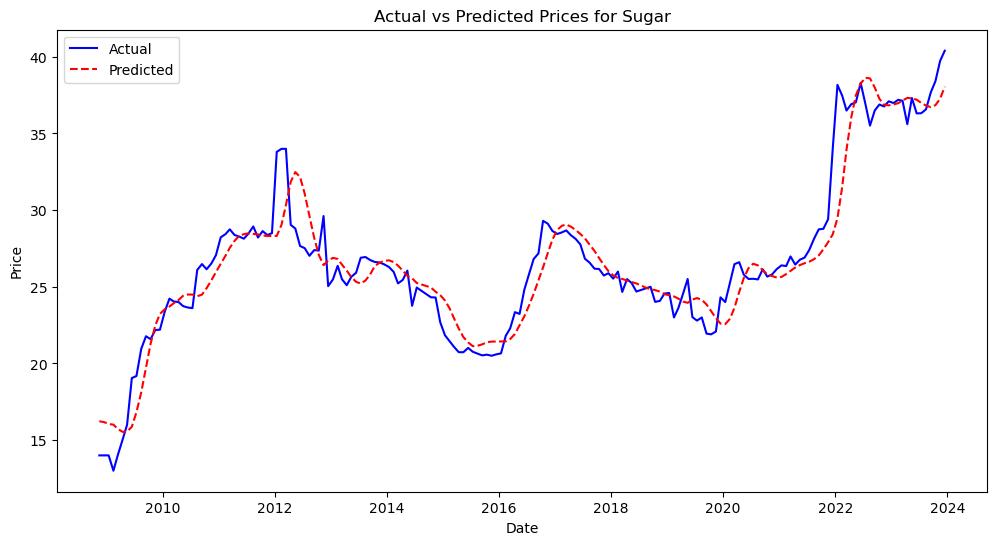

Mean Squared Error for Sugar: 2.980417751294969


C:\Users\HP\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 - 12s - 2s/step - loss: 0.0687
Epoch 2/50
6/6 - 1s - 129ms/step - loss: 0.1003
Epoch 3/50
6/6 - 1s - 222ms/step - loss: 0.0789
Epoch 4/50
6/6 - 1s - 237ms/step - loss: 0.0174
Epoch 5/50
6/6 - 1s - 111ms/step - loss: 0.0571
Epoch 6/50
6/6 - 1s - 126ms/step - loss: 0.0269
Epoch 7/50
6/6 - 1s - 149ms/step - loss: 0.0165
Epoch 8/50
6/6 - 1s - 234ms/step - loss: 0.0190
Epoch 9/50
6/6 - 2s - 264ms/step - loss: 0.0154
Epoch 10/50
6/6 - 1s - 200ms/step - loss: 0.0195
Epoch 11/50
6/6 - 1s - 192ms/step - loss: 0.0126
Epoch 12/50
6/6 - 1s - 209ms/step - loss: 0.0147
Epoch 13/50
6/6 - 1s - 225ms/step - loss: 0.0129
Epoch 14/50
6/6 - 1s - 98ms/step - loss: 0.0128
Epoch 15/50
6/6 - 1s - 108ms/step - loss: 0.0132
Epoch 16/50
6/6 - 1s - 98ms/step - loss: 0.0119
Epoch 17/50
6/6 - 1s - 109ms/step - loss: 0.0126
Epoch 18/50
6/6 - 1s - 97ms/step - loss: 0.0120
Epoch 19/50
6/6 - 1s - 113ms/step - loss: 0.0132
Epoch 20/50
6/6 - 1s - 96ms/step - loss: 0.0117
Epoch 21/50
6/6 - 1s - 111ms/step -

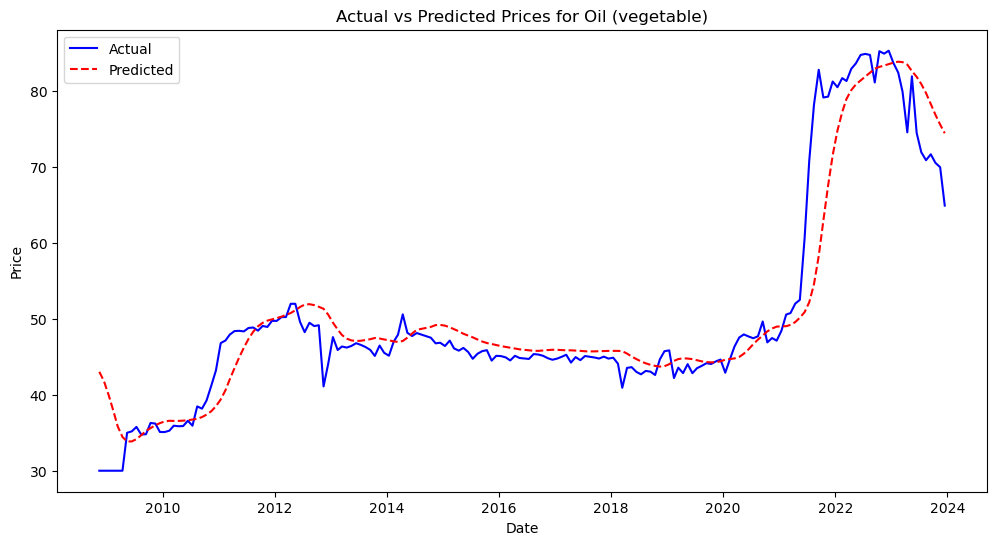

Mean Squared Error for Oil (vegetable): 21.802572112815838


C:\Users\HP\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
8/8 - 12s - 1s/step - loss: 0.0448
Epoch 2/50
8/8 - 2s - 209ms/step - loss: 0.0215
Epoch 3/50
8/8 - 1s - 149ms/step - loss: 0.0162
Epoch 4/50
8/8 - 1s - 117ms/step - loss: 0.0149
Epoch 5/50
8/8 - 1s - 106ms/step - loss: 0.0295
Epoch 6/50
8/8 - 1s - 168ms/step - loss: 0.0333
Epoch 7/50
8/8 - 1s - 125ms/step - loss: 0.0131
Epoch 8/50
8/8 - 1s - 115ms/step - loss: 0.0409
Epoch 9/50
8/8 - 1s - 177ms/step - loss: 0.0547
Epoch 10/50
8/8 - 1s - 107ms/step - loss: 0.0424
Epoch 11/50
8/8 - 1s - 178ms/step - loss: 0.0598
Epoch 12/50
8/8 - 3s - 321ms/step - loss: 0.0849
Epoch 13/50
8/8 - 1s - 144ms/step - loss: 0.0282
Epoch 14/50
8/8 - 2s - 204ms/step - loss: 0.0570
Epoch 15/50
8/8 - 1s - 156ms/step - loss: 0.0354
Epoch 16/50
8/8 - 1s - 158ms/step - loss: 0.0671
Epoch 17/50
8/8 - 1s - 178ms/step - loss: 0.0061
Epoch 18/50
8/8 - 2s - 192ms/step - loss: 0.0102
Epoch 19/50
8/8 - 2s - 196ms/step - loss: 0.0128
Epoch 20/50
8/8 - 2s - 291ms/step - loss: 0.0070
Epoch 21/50
8/8 - 2s - 194ms/st

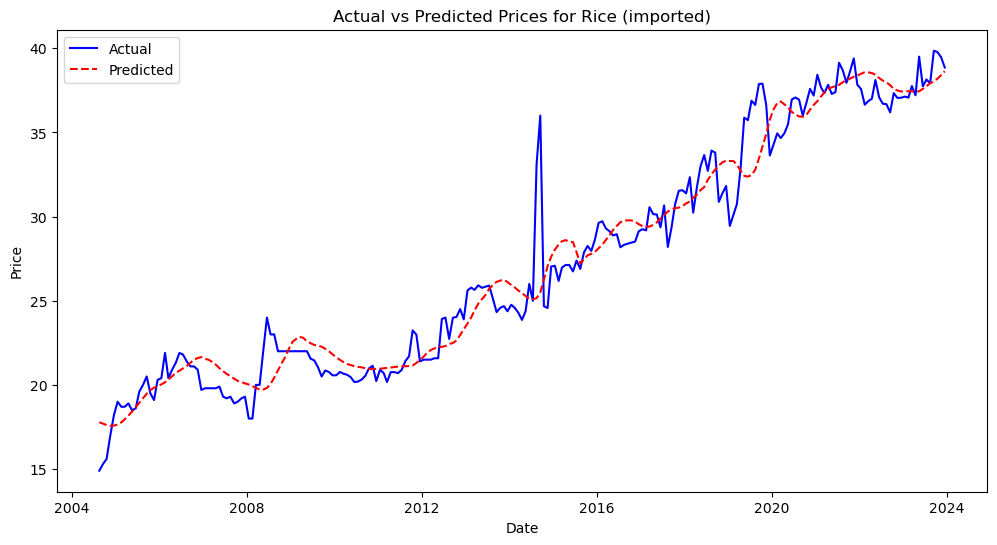

Mean Squared Error for Rice (imported): 2.630042755249421


C:\Users\HP\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 - 11s - 2s/step - loss: 0.0662
Epoch 2/50
6/6 - 1s - 175ms/step - loss: 0.1282
Epoch 3/50
6/6 - 1s - 131ms/step - loss: 0.0129
Epoch 4/50
6/6 - 1s - 104ms/step - loss: 0.0640
Epoch 5/50
6/6 - 1s - 149ms/step - loss: 0.0165
Epoch 6/50
6/6 - 1s - 220ms/step - loss: 0.0172
Epoch 7/50
6/6 - 1s - 141ms/step - loss: 0.0235
Epoch 8/50
6/6 - 1s - 237ms/step - loss: 0.0093
Epoch 9/50
6/6 - 1s - 225ms/step - loss: 0.0220
Epoch 10/50
6/6 - 1s - 98ms/step - loss: 0.0068
Epoch 11/50
6/6 - 1s - 125ms/step - loss: 0.0119
Epoch 12/50
6/6 - 1s - 104ms/step - loss: 0.0044
Epoch 13/50
6/6 - 1s - 123ms/step - loss: 0.0062
Epoch 14/50
6/6 - 1s - 110ms/step - loss: 0.0040
Epoch 15/50
6/6 - 1s - 99ms/step - loss: 0.0045
Epoch 16/50
6/6 - 1s - 109ms/step - loss: 0.0040
Epoch 17/50
6/6 - 1s - 98ms/step - loss: 0.0046
Epoch 18/50
6/6 - 1s - 113ms/step - loss: 0.0040
Epoch 19/50
6/6 - 1s - 97ms/step - loss: 0.0049
Epoch 20/50
6/6 - 1s - 108ms/step - loss: 0.0041
Epoch 21/50
6/6 - 1s - 98ms/step - 

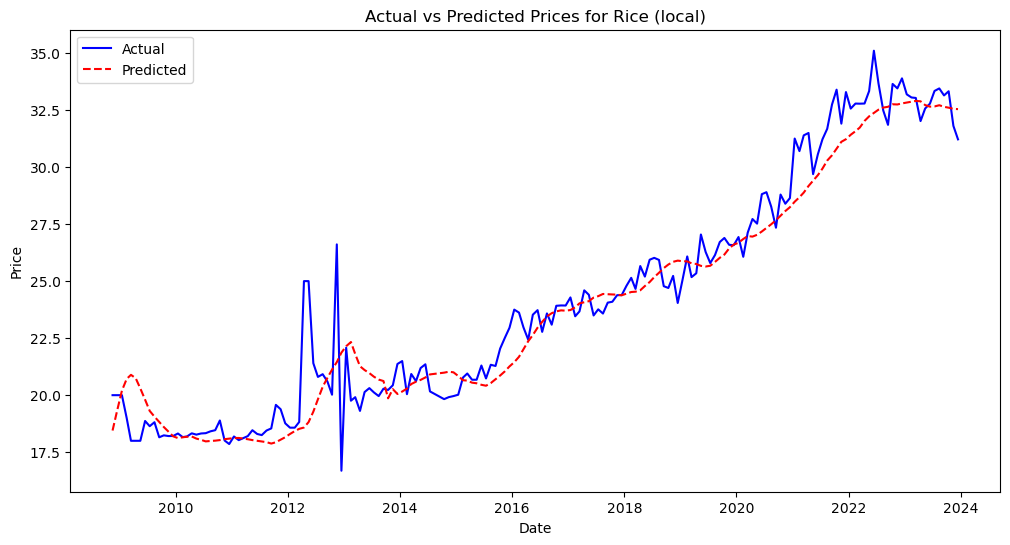

Mean Squared Error for Rice (local): 1.7516006325924032


C:\Users\HP\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 - 9s - 2s/step - loss: 0.2598
Epoch 2/50
6/6 - 1s - 99ms/step - loss: 0.2565
Epoch 3/50
6/6 - 1s - 113ms/step - loss: 0.2097
Epoch 4/50
6/6 - 1s - 98ms/step - loss: 0.0147
Epoch 5/50
6/6 - 1s - 148ms/step - loss: 0.0522
Epoch 6/50
6/6 - 2s - 258ms/step - loss: 0.0166
Epoch 7/50
6/6 - 1s - 196ms/step - loss: 0.0209
Epoch 8/50
6/6 - 1s - 115ms/step - loss: 0.0225
Epoch 9/50
6/6 - 1s - 110ms/step - loss: 0.0081
Epoch 10/50
6/6 - 1s - 123ms/step - loss: 0.0096
Epoch 11/50
6/6 - 1s - 118ms/step - loss: 0.0062
Epoch 12/50
6/6 - 1s - 115ms/step - loss: 0.0060
Epoch 13/50
6/6 - 1s - 220ms/step - loss: 0.0060
Epoch 14/50
6/6 - 1s - 113ms/step - loss: 0.0060
Epoch 15/50
6/6 - 1s - 109ms/step - loss: 0.0063
Epoch 16/50
6/6 - 1s - 110ms/step - loss: 0.0056
Epoch 17/50
6/6 - 1s - 133ms/step - loss: 0.0071
Epoch 18/50
6/6 - 1s - 120ms/step - loss: 0.0061
Epoch 19/50
6/6 - 1s - 116ms/step - loss: 0.0086
Epoch 20/50
6/6 - 2s - 267ms/step - loss: 0.0082
Epoch 21/50
6/6 - 1s - 147ms/step 

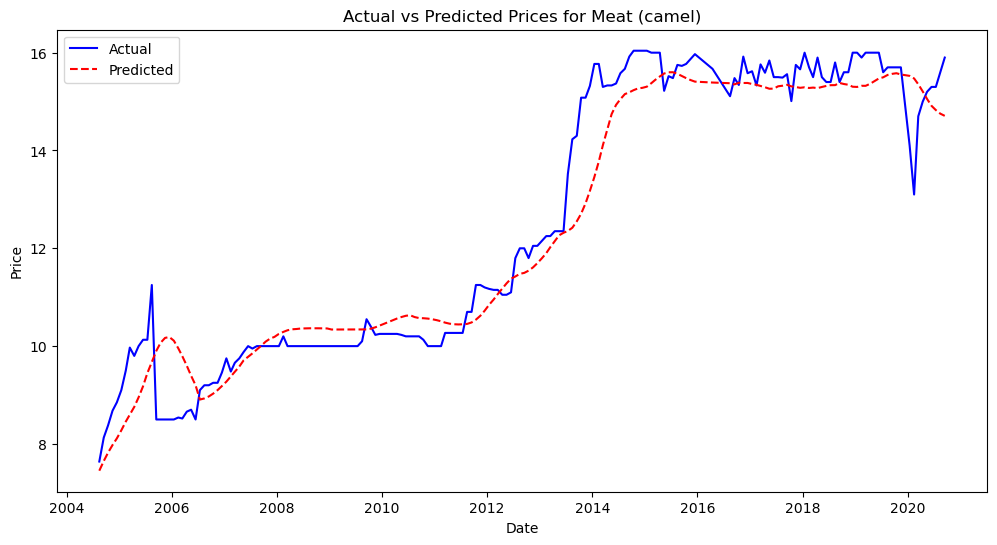

Mean Squared Error for Meat (camel): 0.5065676620912951


C:\Users\HP\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 - 16s - 3s/step - loss: 0.2216
Epoch 2/50
6/6 - 1s - 195ms/step - loss: 0.2242
Epoch 3/50
6/6 - 1s - 140ms/step - loss: 0.1832
Epoch 4/50
6/6 - 1s - 228ms/step - loss: 0.0119
Epoch 5/50
6/6 - 1s - 108ms/step - loss: 0.0527
Epoch 6/50
6/6 - 1s - 112ms/step - loss: 0.0261
Epoch 7/50
6/6 - 1s - 139ms/step - loss: 0.0135
Epoch 8/50
6/6 - 1s - 237ms/step - loss: 0.0173
Epoch 9/50
6/6 - 1s - 224ms/step - loss: 0.0061
Epoch 10/50
6/6 - 1s - 106ms/step - loss: 0.0060
Epoch 11/50
6/6 - 1s - 121ms/step - loss: 0.0047
Epoch 12/50
6/6 - 1s - 104ms/step - loss: 0.0043
Epoch 13/50
6/6 - 1s - 117ms/step - loss: 0.0054
Epoch 14/50
6/6 - 1s - 125ms/step - loss: 0.0052
Epoch 15/50
6/6 - 1s - 245ms/step - loss: 0.0103
Epoch 16/50
6/6 - 1s - 191ms/step - loss: 0.0099
Epoch 17/50
6/6 - 1s - 234ms/step - loss: 0.0284
Epoch 18/50
6/6 - 1s - 192ms/step - loss: 0.0130
Epoch 19/50
6/6 - 2s - 329ms/step - loss: 0.0236
Epoch 20/50
6/6 - 1s - 194ms/step - loss: 0.0051
Epoch 21/50
6/6 - 2s - 253ms/st

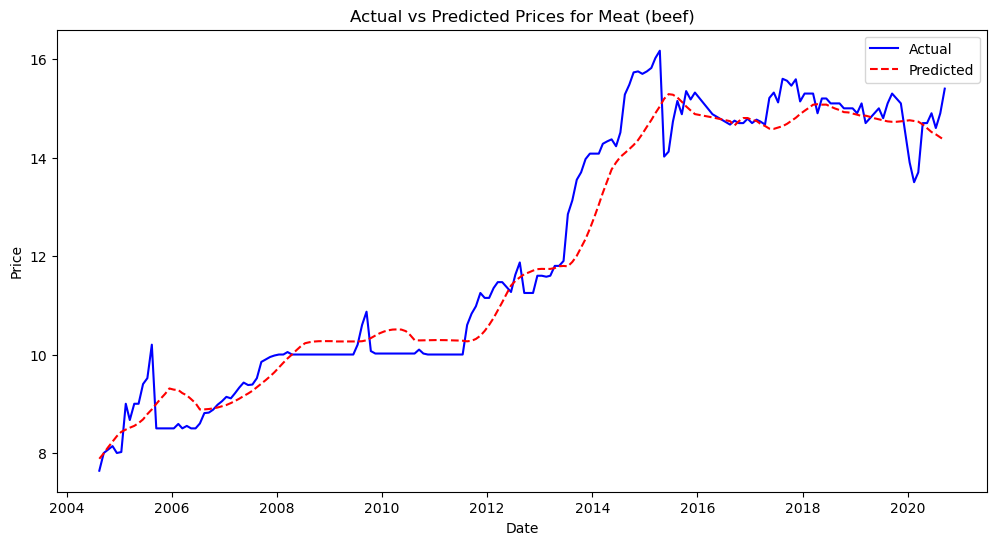

Mean Squared Error for Meat (beef): 0.33269433148208605


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Convertir la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'])

# Produits spécifiés
produits_specifies = ['Sugar', 'Oil (vegetable)', 'Rice (imported)', 'Rice (local)', 'Meat (camel)', 'Meat (beef)']

# Calculer la moyenne des prix par jour et produit
df_moyennes = df.groupby(['date', 'commodity'])['price'].mean().reset_index()

# Filtrer les données pour les produits spécifiés
df_produits = df_moyennes[df_moyennes['commodity'].isin(produits_specifies)]

# Préparation des données pour LSTM
def prepare_data(df, produit, time_steps=10):
    df_produit = df[df['commodity'] == produit].copy()
    df_produit.set_index('date', inplace=True)
    values = df_produit['price'].values.reshape(-1, 1)

    # Normalisation des données
    scaler = MinMaxScaler(feature_range=(0, 1))
    values_scaled = scaler.fit_transform(values)

    # Création des séquences
    X, y = [], []
    for i in range(len(values_scaled) - time_steps):
        X.append(values_scaled[i:(i + time_steps), 0])
        y.append(values_scaled[i + time_steps, 0])

    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    return X, y, scaler

# Construire et entraîner le modèle LSTM
def train_lstm(X, y, epochs=50, batch_size=32):
    model = Sequential()
    model.add(LSTM(256, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(256))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=2, shuffle=False)
    return model

# Faire des prédictions
def predict(model, X, scaler):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions)
    return predictions

# Visualiser les résultats
def plot_predictions(dates, actual, predicted, produit):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, actual, color='blue', label='Actual')
    plt.plot(dates, predicted, color='red', linestyle='--', label='Predicted')
    plt.title(f'Actual vs Predicted Prices for {produit}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Fonction pour prédire le prix futur pour une date donnée
def predict_future_price(produit, future_date, df_produits, time_steps=10):
    future_date = pd.to_datetime(future_date)

    # Préparer les données pour le produit
    X, y, scaler = prepare_data(df_produits, produit, time_steps)
    model = train_lstm(X, y, epochs=50, batch_size=32)

    # Calculer le nombre de jours à prédire
    last_date = df_produits[df_produits['commodity'] == produit]['date'].max()
    days_to_predict = (future_date - last_date).days

    if days_to_predict <= 0:
        raise ValueError("Future date must be after the last date in the dataset.")

    # Utiliser la dernière séquence pour prédire plusieurs jours dans le futur
    last_sequence = X[-1].reshape((1, time_steps, 1))

    for _ in range(days_to_predict):
        future_price_scaled = model.predict(last_sequence)
        last_sequence = np.append(last_sequence[:, 1:, :], future_price_scaled.reshape(1, 1, 1), axis=1)

    future_price = scaler.inverse_transform(future_price_scaled)
    return future_price[0][0]

# Paramètres
time_steps = 10

for produit in produits_specifies:
    X, y, scaler = prepare_data(df_produits, produit, time_steps)
    model = train_lstm(X, y, epochs=50, batch_size=32)

    # Faire des prédictions
    predictions = predict(model, X, scaler)

    # Comparer avec les données réelles
    dates = df_produits[df_produits['commodity'] == produit]['date'][time_steps:]
    actual_prices = df_produits[df_produits['commodity'] == produit]['price'][time_steps:]

    # Visualisation
    plot_predictions(dates, actual_prices, predictions, produit)

    # Evaluation du modèle
    mse = mean_squared_error(actual_prices, predictions)
    print(f'Mean Squared Error for {produit}: {mse}')


Meat (beef) et Meat (camel) : Les faibles MSE pour ces séries suggèrent que le modèle est efficace pour capturer les dynamiques des prix de la viande de bœuf et de chameau. Cela pourrait être dû à des tendances saisonnières ou des cycles de prix que le modèle a bien appris.

Rice (imported) et Rice (local) :Les faibles MSE pour ces séries indique que le modèle est également performant pour prédire les prix du riz, qu'il soit importé ou local. Cela pourrait être attribué à une bonne capture des variations de prix influencées par des facteurs comme les politiques d'importation, les conditions climatiques, et la demande.

In [ ]:
# Fonction pour prédire le prix futur pour une date donnée
def predict_future_price(produit, future_date, df_produits, time_steps=10):
    future_date = pd.to_datetime(future_date)

    # Préparer les données pour le produit
    X, y, scaler = prepare_data(df_produits, produit, time_steps)
    model = train_lstm(X, y, epochs=50, batch_size=32)

    # Calculer le nombre de jours à prédire
    last_date = df_produits[df_produits['commodity'] == produit]['date'].max()
    days_to_predict = (future_date - last_date).days

    if days_to_predict <= 0:
        raise ValueError("Future date must be after the last date in the dataset.")

    # Utiliser la dernière séquence pour prédire plusieurs jours dans le futur
    last_sequence = X[-1].reshape((1, time_steps, 1))

    for _ in range(days_to_predict):
        future_price_scaled = model.predict(last_sequence)
        last_sequence = np.append(last_sequence[:, 1:, :], future_price_scaled.reshape(1, 1, 1), axis=1)

    future_price = scaler.inverse_transform(future_price_scaled)
    return future_price[0][0]

# Exemple d'utilisation de la fonaction pour une date future
produit = 'Sugar'
future_date = '2024-01-01'
predicted_price = predict_future_price(produit, future_date, df_produits)

print(f'Predicted future price for {produit} on {future_date}: {predicted_price}')


C:\Users\HP\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 - 16s - 3s/step - loss: 0.0898
Epoch 2/50
6/6 - 1s - 132ms/step - loss: 0.0425
Epoch 3/50
6/6 - 1s - 114ms/step - loss: 0.0421
Epoch 4/50
6/6 - 1s - 161ms/step - loss: 0.0152
Epoch 5/50
6/6 - 1s - 157ms/step - loss: 0.0202
Epoch 6/50
6/6 - 1s - 158ms/step - loss: 0.0137
Epoch 7/50
6/6 - 2s - 263ms/step - loss: 0.0135
Epoch 8/50
6/6 - 1s - 152ms/step - loss: 0.0117
Epoch 9/50
6/6 - 1s - 132ms/step - loss: 0.0112
Epoch 10/50
6/6 - 1s - 136ms/step - loss: 0.0106
Epoch 11/50
6/6 - 1s - 105ms/step - loss: 0.0109
Epoch 12/50
6/6 - 1s - 121ms/step - loss: 0.0100
Epoch 13/50
6/6 - 1s - 146ms/step - loss: 0.0115
Epoch 14/50
6/6 - 1s - 103ms/step - loss: 0.0100
Epoch 15/50
6/6 - 1s - 117ms/step - loss: 0.0110
Epoch 16/50
6/6 - 1s - 110ms/step - loss: 0.0097
Epoch 17/50
6/6 - 1s - 115ms/step - loss: 0.0103
Epoch 18/50
6/6 - 1s - 115ms/step - loss: 0.0099
Epoch 19/50
6/6 - 1s - 110ms/step - loss: 0.0096
Epoch 20/50
6/6 - 1s - 125ms/step - loss: 0.0095
Epoch 21/50
6/6 - 1s - 102ms/st

<div style="background-color: #d1e7f2; padding: 20px; border-radius: 10px;">
    <font color="navy">
        <span style="font-family: 'Times New Roman'; font-size: 16pt;">
            <b>II-3.&nbsp;&nbsp;&nbsp; <b> Recommandations:</b>
        </span>
    </font>
</div>


1. *Mise en Place d'un Observatoire des Prix* : Établir un système national de surveillance des prix des denrées alimentaires pour détecter rapidement les fluctuations et les tendances. Cela permettrait de réagir promptement aux changements du marché.

2. *Promotion de l'Agriculture Locale* : Encourager la production locale de denrées alimentaires pour réduire la dépendance aux importations et stabiliser les prix.

3. *Accords Commerciaux Stratégiques* : Négocier des accords commerciaux avec des pays partenaires pour diversifier les sources d'importation et atténuer les impacts des fluctuations du marché international.

4. *Investissement dans les Transports* : Améliorer les infrastructures de transport pour faciliter l'acheminement des produits alimentaires des zones de production aux marchés urbains et ruraux.

5. *Programmes de Sensibilisation* : Développer des campagnes de sensibilisation pour informer les agriculteurs et les commerçants sur les meilleures pratiques agricoles et commerciales.

6. *Formation Continue* : Offrir des programmes de formation continue aux parties prenantes du secteur agricole et alimentaire pour améliorer leurs compétences en gestion et en adaptation aux changements du marché.